In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions
using StatsBase
using Alert

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64,η::Float64,cte::Float64=0.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)                 #Usamos un for para poder hacer el proceso
        x0=x0-γ*Δt*(x0-cte)+(η*sqrt(Δt)*randn()) # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end

OUH (generic function with 2 methods)

In [3]:
function eigen2(n::Int64,Δt::Float64,K::Array{Float64,1},T::Array{Float64,1}) 
    R=diagm(0 =>ones(3)) #Hacemos una matriz llena de unos en la diagonal de dimension 2
    for i=1:n            #Hacemos un for donde n es la cantidad de pasos de t, pasos de tiempo
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2))*R #Hacemos los pasos de multiplicar la matriz por la matriz anterior 
    end
    eigvecs(R) #Obtenemos el eigenvalor y eigenvector
end

eigen2 (generic function with 1 method)

In [4]:
function R0(Δt::Float64,K::Array{Float64,1},T::Array{Float64,1},i::Int64) 
    R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2)) #Hacemos los pasos de multiplicar la matriz por la matriz anterior 
    return eigvecs(R)
end

R0 (generic function with 1 method)

In [55]:
k0=0.0
t0=0.0

γK=2.0
γT=2.0

ηK=1.0
ηT=1.0

N=20.0

Δt=0.001

t=0:Δt:N

ctek=2.0
ctet=2.0

#para animar
tiradas=10000
step=300
length(1:step:length(t))
length(t)

20001

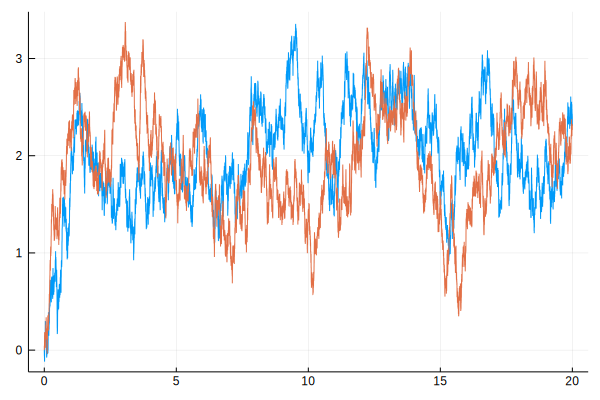

In [56]:
K=OUH(k0,γK,t,Δt,ηK,ctek)
T=OUH(t0,γT,t,Δt,ηT,ctet)
plot(t,K,legend=false)
plot!(t,T,legend=false)

# EJE EN TODO EL TIEMPO

In [337]:
@time begin
    pasos=length(t)

    v=Array{Array{Float64,1},1}(undef,pasos)

    for j=1:pasos

        
        v[j]=real(eigen2(j,Δt,K,T)[:, 3])
        

    end
end
alert("TERMINO El analisis de RTM-OH 3D")

855.655115 seconds (12.60 G allocations: 599.225 GiB, 10.11% gc time)


#< CLIXML
base64 binary data: PE9ianMgVmVyc2lvbj0iMS4xLjAuMSIgeG1sbnM9Imh0dHA6Ly9zY2hlbWFzLm1pY3Jvc29mdC5jb20vcG93ZXJzaGVsbC8yMDA0LzA0Ij48T2JqIFM9InByb2dyZXNzIiBSZWZJZD0iMCI+PFROIFJlZklkPSIwIj48VD5TeXN0ZW0uTWFuYWdlbWVudC5BdXRvbWF0aW9uLlBTQ3VzdG9tT2JqZWN0PC9UPjxUPlN5c3RlbS5PYmplY3Q8L1Q+PC9UTj48TVM+PEk2NCBOPSJTb3VyY2VJZCI+MTwvSTY0PjxQUiBOPSJSZWNvcmQiPjxBVj5QcmVwYXJhbmRvIG2iZHVsb3MgcGFyYSBlbCBwcmltZXIgdXNvLjwvQVY+PEFJPjA8L0FJPjxOaWwgLz48UEk+LTE8L1BJPjxQQz4tMTwvUEM+PFQ+Q29tcGxldGVkPC9UPjxTUj4tMTwvU1I+PFNEPiA8L1NEPjwvUFI+PC9NUz48L09iaj48L09ianM+


Process(`powershell.exe -Enc JABFAHIAcgBvAHIAQQBjAHQAaQBvAG4AUAByAGUAZgBlAHIAZQBuAGMAZQAgAD0AIAAiAFMAdABvAHAAIgAKAAoAJABuAG8AdABpAGYAaQBjAGEAdABpAG8AbgBUAGkAdABsAGUAIAA9ACAAIgBUAEUAUgBNAEkATgBPACAARQBsACAAYQBuAGEAbABpAHMAaQBzACAAZABlACAAUgBUAE0ALQBPAEgAIAAzAEQAIgAKAAoAWwBXAGkAbgBkAG8AdwBzAC4AVQBJAC4ATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4AcwAuAFQAbwBhAHMAdABOAG8AdABpAGYAaQBjAGEAdABpAG8AbgBNAGEAbgBhAGcAZQByACwAIABXAGkAbgBkAG8AdwBzAC4AVQBJAC4ATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4AcwAsACAAQwBvAG4AdABlAG4AdABUAHkAcABlACAAPQAgAFcAaQBuAGQAbwB3AHMAUgB1AG4AdABpAG0AZQBdACAAPgAgACQAbgB1AGwAbAAKACQAdABlAG0AcABsAGEAdABlACAAPQAgAFsAVwBpAG4AZABvAHcAcwAuAFUASQAuAE4AbwB0AGkAZgBpAGMAYQB0AGkAbwBuAHMALgBUAG8AYQBzAHQATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4ATQBhAG4AYQBnAGUAcgBdADoAOgBHAGUAdABUAGUAbQBwAGwAYQB0AGUAQwBvAG4AdABlAG4AdAAoAFsAVwBpAG4AZABvAHcAcwAuAFUASQAuAE4AbwB0AGkAZgBpAGMAYQB0AGkAbwBuAHMALgBUAG8AYQBzAHQAVABlAG0AcABsAGEAdABlAFQAeQBwAGUAXQA6ADoAVABvAGEAcwB0AFQAZQB4AHQAMAAxACkACgAKACMAQwBvAG4AdgBlAHIAdAAgAHQAbwAgAC4ATgB

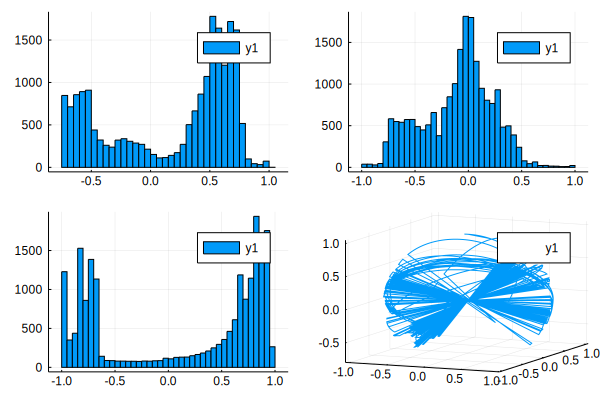

In [339]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=histogram(transpose(hcat(v...))[:,3],bins=60)
Q2=histogram(transpose(hcat(v...))[:,2],bins=60)
Q3=histogram(transpose(hcat(v...))[:,1],bins=60)
Q4=plot(transpose(hcat(v...))[:,1],transpose(hcat(v...))[:,2],transpose(hcat(v...))[:,3])
plot(Q1,Q2,Q3,Q4,layout=l)


# EJE EN UN MOMENTO DADO

In [45]:
@time begin
    tiradas=5000
    PASO=7000
    v=Array{Array{Float64,1},1}(undef,tiradas)
    for j=1:tiradas
    v[j]=real(eigen2(PASO,Δt,OUH(k0,γK,t,Δt,ηK,ctek),OUH(t0,γT,t,Δt,ηT,ctet))[:, 3])
    end
end
alert("TERMINO El analisis de RTM-OH 3D")

139.137263 seconds (2.21 G allocations: 105.603 GiB, 7.82% gc time)


base64 binary data: IzwgQ0xJWE1MDQo8T2JqcyBWZXJzaW9uPSIxLjEuMC4xIiB4bWxucz0iaHR0cDovL3NjaGVtYXMubWljcm9zb2Z0LmNvbS9wb3dlcnNoZWxsLzIwMDQvMDQiPjxPYmogUz0icHJvZ3Jlc3MiIFJlZklkPSIwIj48VE4gUmVmSWQ9IjAiPjxUPlN5c3RlbS5NYW5hZ2VtZW50LkF1dG9tYXRpb24uUFNDdXN0b21PYmplY3Q8L1Q+PFQ+U3lzdGVtLk9iamVjdDwvVD48L1ROPjxNUz48STY0IE49IlNvdXJjZUlkIj4xPC9JNjQ+PFBSIE49IlJlY29yZCI+PEFWPlByZXBhcmFuZG8gbaJkdWxvcyBwYXJhIGVsIHByaW1lciB1c28uPC9BVj48QUk+MDwvQUk+PE5pbCAvPjxQST4tMTwvUEk+PFBDPi0xPC9QQz48VD5Db21wbGV0ZWQ8L1Q+PFNSPi0xPC9TUj48U0Q+IDwvU0Q+PC9QUj48L01TPjwvT2JqPjwvT2Jqcz4=


Process(`powershell.exe -Enc JABFAHIAcgBvAHIAQQBjAHQAaQBvAG4AUAByAGUAZgBlAHIAZQBuAGMAZQAgAD0AIAAiAFMAdABvAHAAIgAKAAoAJABuAG8AdABpAGYAaQBjAGEAdABpAG8AbgBUAGkAdABsAGUAIAA9ACAAIgBUAEUAUgBNAEkATgBPACAARQBsACAAYQBuAGEAbABpAHMAaQBzACAAZABlACAAUgBUAE0ALQBPAEgAIAAzAEQAIgAKAAoAWwBXAGkAbgBkAG8AdwBzAC4AVQBJAC4ATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4AcwAuAFQAbwBhAHMAdABOAG8AdABpAGYAaQBjAGEAdABpAG8AbgBNAGEAbgBhAGcAZQByACwAIABXAGkAbgBkAG8AdwBzAC4AVQBJAC4ATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4AcwAsACAAQwBvAG4AdABlAG4AdABUAHkAcABlACAAPQAgAFcAaQBuAGQAbwB3AHMAUgB1AG4AdABpAG0AZQBdACAAPgAgACQAbgB1AGwAbAAKACQAdABlAG0AcABsAGEAdABlACAAPQAgAFsAVwBpAG4AZABvAHcAcwAuAFUASQAuAE4AbwB0AGkAZgBpAGMAYQB0AGkAbwBuAHMALgBUAG8AYQBzAHQATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4ATQBhAG4AYQBnAGUAcgBdADoAOgBHAGUAdABUAGUAbQBwAGwAYQB0AGUAQwBvAG4AdABlAG4AdAAoAFsAVwBpAG4AZABvAHcAcwAuAFUASQAuAE4AbwB0AGkAZgBpAGMAYQB0AGkAbwBuAHMALgBUAG8AYQBzAHQAVABlAG0AcABsAGEAdABlAFQAeQBwAGUAXQA6ADoAVABvAGEAcwB0AFQAZQB4AHQAMAAxACkACgAKACMAQwBvAG4AdgBlAHIAdAAgAHQAbwAgAC4ATgB

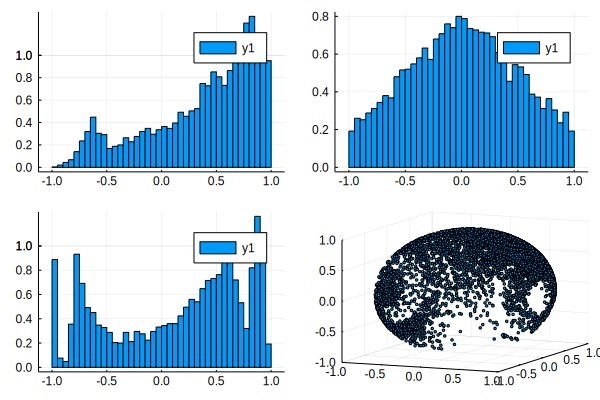

In [46]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=histogram(transpose(hcat(v...))[:,3],bins=60,normalized=true)
Q2=histogram(transpose(hcat(v...))[:,2],bins=60,normalized=true)
Q3=histogram(transpose(hcat(v...))[:,1],bins=60,normalized=true)
Q4=scatter(transpose(hcat(v...))[:,1],transpose(hcat(v...))[:,2],transpose(hcat(v...))[:,3],markersize=1,legend=false,xlims=(-1,1),ylims=(-1,1),zlims=(-1,1))
plot(Q1,Q2,Q3,Q4,layout=l)

In [57]:
step=100

100

In [58]:
length(t)

20001

In [59]:
length(2:step:length(t))

200

8348.706519 seconds (125.42 G allocations: 5.882 TiB, 7.84% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\tesis\EJES.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\tesis\\EJES.gif")
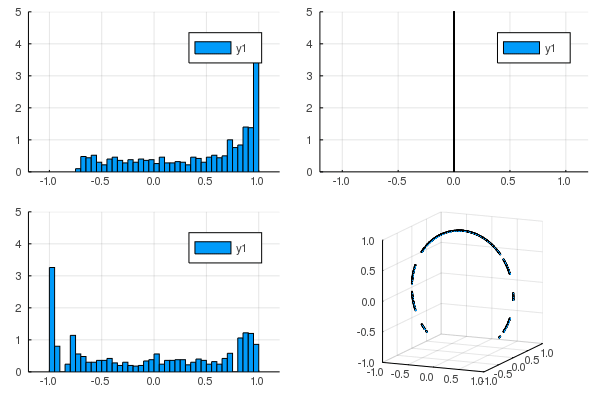

In [62]:
@time begin
    anim= @animate for k=2:step:length(t)
        tiradas=1000
        PASO=k
        v=Array{Array{Float64,1},1}(undef,tiradas)
        for j=1:tiradas
            v[j]=real(eigen2(k,Δt,OUH(k0,γK,t,Δt,ηK,ctek),OUH(t0,γT,t,Δt,ηT,ctet))[:, 3])
        end

        l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
        Q1=histogram(transpose(hcat(v...))[:,3],bins=60,normalized=true,ylims=(0,5),xlims=(-1.2,1.2))
        Q2=histogram(transpose(hcat(v...))[:,2],bins=60,normalized=true,ylims=(0,5),xlims=(-1.2,1.2))
        Q3=histogram(transpose(hcat(v...))[:,1],bins=60,normalized=true,ylims=(0,5),xlims=(-1.2,1.2))
        Q4=scatter(transpose(hcat(v...))[:,1],transpose(hcat(v...))[:,2],transpose(hcat(v...))[:,3],markersize=1,legend=false,xlims=(-1,1),ylims=(-1,1),zlims=(-1,1),aspect_ratio=:equal)
        plot(Q1,Q2,Q3,Q4,layout=l)
    end
    gif(anim,"./EJES.gif", fps=60)
end

In [63]:
alert("TERMINO El analisis de RTM-OH 3D")

#< CLIXML
base64 binary data: PE9ianMgVmVyc2lvbj0iMS4xLjAuMSIgeG1sbnM9Imh0dHA6Ly9zY2hlbWFzLm1pY3Jvc29mdC5jb20vcG93ZXJzaGVsbC8yMDA0LzA0Ij48T2JqIFM9InByb2dyZXNzIiBSZWZJZD0iMCI+PFROIFJlZklkPSIwIj48VD5TeXN0ZW0uTWFuYWdlbWVudC5BdXRvbWF0aW9uLlBTQ3VzdG9tT2JqZWN0PC9UPjxUPlN5c3RlbS5PYmplY3Q8L1Q+PC9UTj48TVM+PEk2NCBOPSJTb3VyY2VJZCI+MTwvSTY0PjxQUiBOPSJSZWNvcmQiPjxBVj5QcmVwYXJhbmRvIG2iZHVsb3MgcGFyYSBlbCBwcmltZXIgdXNvLjwvQVY+PEFJPjA8L0FJPjxOaWwgLz48UEk+LTE8L1BJPjxQQz4tMTwvUEM+PFQ+Q29tcGxldGVkPC9UPjxTUj4tMTwvU1I+PFNEPiA8L1NEPjwvUFI+PC9NUz48L09iaj48L09ianM+


Process(`powershell.exe -Enc JABFAHIAcgBvAHIAQQBjAHQAaQBvAG4AUAByAGUAZgBlAHIAZQBuAGMAZQAgAD0AIAAiAFMAdABvAHAAIgAKAAoAJABuAG8AdABpAGYAaQBjAGEAdABpAG8AbgBUAGkAdABsAGUAIAA9ACAAIgBUAEUAUgBNAEkATgBPACAARQBsACAAYQBuAGEAbABpAHMAaQBzACAAZABlACAAUgBUAE0ALQBPAEgAIAAzAEQAIgAKAAoAWwBXAGkAbgBkAG8AdwBzAC4AVQBJAC4ATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4AcwAuAFQAbwBhAHMAdABOAG8AdABpAGYAaQBjAGEAdABpAG8AbgBNAGEAbgBhAGcAZQByACwAIABXAGkAbgBkAG8AdwBzAC4AVQBJAC4ATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4AcwAsACAAQwBvAG4AdABlAG4AdABUAHkAcABlACAAPQAgAFcAaQBuAGQAbwB3AHMAUgB1AG4AdABpAG0AZQBdACAAPgAgACQAbgB1AGwAbAAKACQAdABlAG0AcABsAGEAdABlACAAPQAgAFsAVwBpAG4AZABvAHcAcwAuAFUASQAuAE4AbwB0AGkAZgBpAGMAYQB0AGkAbwBuAHMALgBUAG8AYQBzAHQATgBvAHQAaQBmAGkAYwBhAHQAaQBvAG4ATQBhAG4AYQBnAGUAcgBdADoAOgBHAGUAdABUAGUAbQBwAGwAYQB0AGUAQwBvAG4AdABlAG4AdAAoAFsAVwBpAG4AZABvAHcAcwAuAFUASQAuAE4AbwB0AGkAZgBpAGMAYQB0AGkAbwBuAHMALgBUAG8AYQBzAHQAVABlAG0AcABsAGEAdABlAFQAeQBwAGUAXQA6ADoAVABvAGEAcwB0AFQAZQB4AHQAMAAxACkACgAKACMAQwBvAG4AdgBlAHIAdAAgAHQAbwAgAC4ATgB

In [274]:
@time begin
    pasos=4000

    v0=Array{Array{Float64,1},1}(undef,pasos)

    for j=1:pasos

        for i=1:3
            @inbounds a=imag(R0(Δt,K,T,j)[:, i])
            if a==[0.0,0.0,0.0]
               @inbounds v0[j]=real(R0(Δt,K,T,j)[:, i])
            end
        end 

    end
end


  0.205866 seconds (1.37 M allocations: 131.168 MiB, 13.99% gc time)


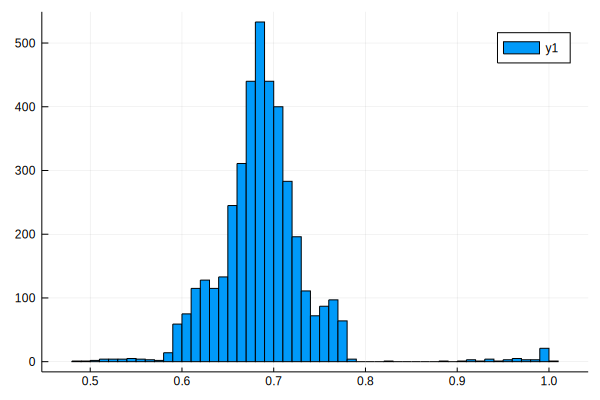

In [275]:
histogram(abs.(transpose(hcat(v0...))[:,3]),bins=60)

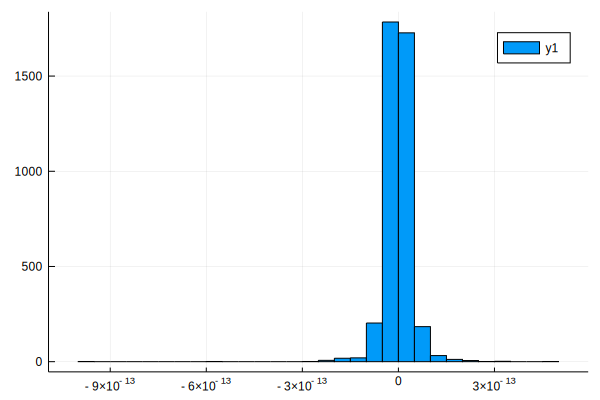

In [276]:
histogram(transpose(hcat(v0...))[:,2],bins=60)

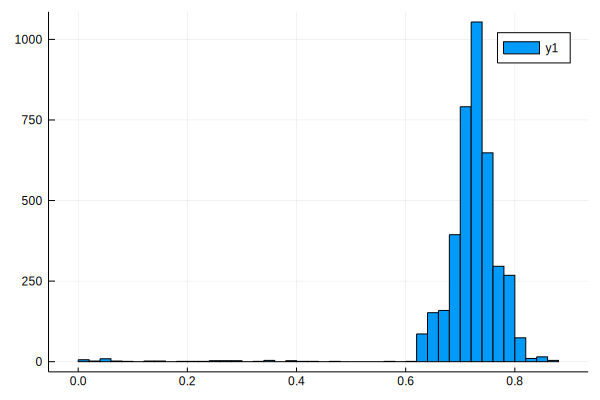

In [277]:
histogram(abs.(transpose(hcat(v0...))[:,1]),bins=60)

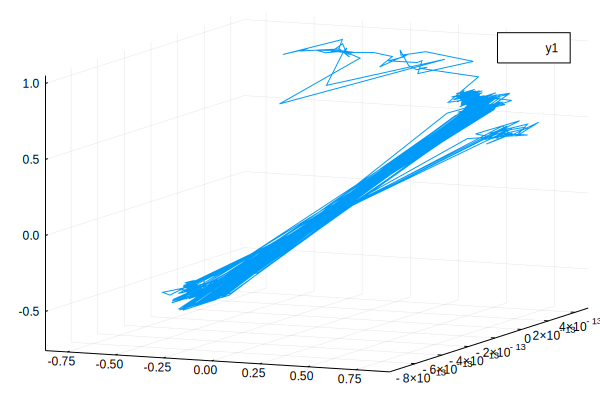

In [290]:
plot(transpose(hcat(v0...))[:,1],transpose(hcat(v0...))[:,2],transpose(hcat(v0...))[:,3])


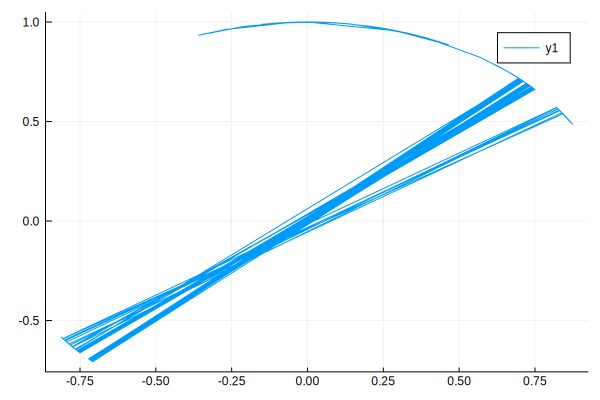

In [295]:
plot(transpose(hcat(v0...))[:,1],transpose(hcat(v0...))[:,3])

In [152]:
entrada1(k,t)=t/sqrt(k^2+t^2)
entrada3(k,t)=k/sqrt(k^2+t^2)

entrada3 (generic function with 1 method)

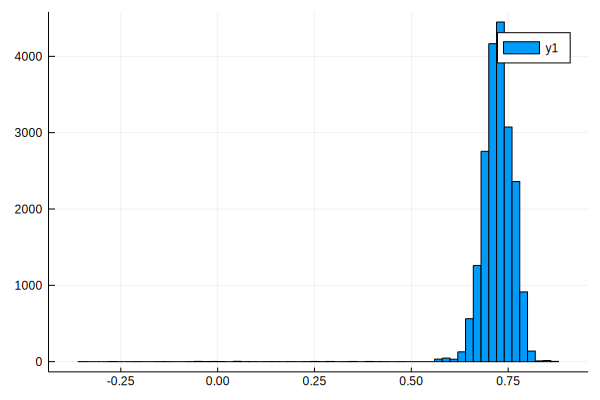

In [278]:
histogram(entrada1.(K,T),bins=60)

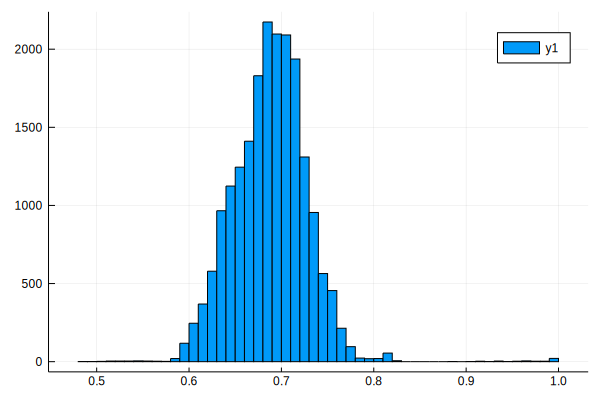

In [279]:
histogram(entrada3.(K,T),bins=60)

In [166]:
i=9
(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2))

3×3 Array{Float64,2}:
  1.0          5.34428e-5  -4.67478e-10
 -5.34428e-5   1.0         -1.74945e-5 
 -4.67478e-10  1.74945e-5   1.0        

In [181]:
a11(K,T,Δt)=1-(K^2*Δt^2)/2
a22(K,T,Δt)=1-((K^2+T^2)*Δt^2)/2
a33(K,T,Δt)=1-(T^2*Δt^2)/2
a12(K,T,Δt)=K*Δt #con un menos para 21
a13(K,T,Δt)=K*T*Δt^2/2 #igual para 31
a23(K,T,Δt)=T*Δt #con un menos para 32

a23 (generic function with 1 method)

In [218]:
i=23
A=[a11(K[i],T[i],Δt) a12(K[i],T[i],Δt) a13(K[i],T[i],Δt); -a12(K[i],T[i],Δt) a22(K[i],T[i],Δt) a23(K[i],T[i],Δt) ; a13(K[i],T[i],Δt) -a23(K[i],T[i],Δt) a33(K[i],T[i],Δt)]
eigvecs(A)

3×3 Array{Complex{Float64},2}:
 7.53619e-13+0.706532im   7.53619e-13-0.706532im    -0.0403117+0.0im
    0.707107-0.0im           0.707107+0.0im        1.26357e-14+0.0im
 4.76424e-14+0.0285046im  4.76424e-14-0.0285046im     0.999187+0.0im

In [224]:
eigvecs(A)[:, 3]

3-element Array{Complex{Float64},1}:
  -0.040311658544340295 + 0.0im
 1.2635671660512334e-14 + 0.0im
      0.999187154733989 + 0.0im

In [203]:
[entrada1(K[i],T[i]),0,entrada3(K[i],T[i])]


3-element Array{Float64,1}:
 -0.040311658544340274
  0.0                 
  0.999187154733989   

In [213]:
norm([entrada1(K[i],T[i])-0.0im,0+0.0im,entrada3(K[i],T[i])+0.0im])

0.9999999999999999

In [210]:
norm([0.707107-0.0im, 0.707107+0.0im,1.26357e-14+0.0im])

1.0000003094489522

In [214]:
?eigvecs()

```
eigvecs(A::SymTridiagonal[, eigvals]) -> Matrix
```

Return a matrix `M` whose columns are the eigenvectors of `A`. (The `k`th eigenvector can be obtained from the slice `M[:, k]`.)

If the optional vector of eigenvalues `eigvals` is specified, `eigvecs` returns the specific corresponding eigenvectors.

# Examples

```jldoctest
julia> A = SymTridiagonal([1.; 2.; 1.], [2.; 3.])
3×3 SymTridiagonal{Float64,Array{Float64,1}}:
 1.0  2.0   ⋅
 2.0  2.0  3.0
  ⋅   3.0  1.0

julia> eigvals(A)
3-element Array{Float64,1}:
 -2.1400549446402604
  1.0000000000000002
  5.140054944640259

julia> eigvecs(A)
3×3 Array{Float64,2}:
  0.418304  -0.83205      0.364299
 -0.656749  -7.39009e-16  0.754109
  0.627457   0.5547       0.546448

julia> eigvecs(A, [1.])
3×1 Array{Float64,2}:
  0.8320502943378438
  4.263514128092366e-17
 -0.5547001962252291
```

---

```
eigvecs(A; permute::Bool=true, scale::Bool=true, `sortby`) -> Matrix
```

Return a matrix `M` whose columns are the eigenvectors of `A`. (The `k`th eigenvector can be obtained from the slice `M[:, k]`.) The `permute`, `scale`, and `sortby` keywords are the same as for [`eigen`](@ref).

# Examples

```jldoctest
julia> eigvecs([1.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 18.0])
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
```

---

```
eigvecs(A, B) -> Matrix
```

Return a matrix `M` whose columns are the generalized eigenvectors of `A` and `B`. (The `k`th eigenvector can be obtained from the slice `M[:, k]`.)

# Examples

```jldoctest
julia> A = [1 0; 0 -1]
2×2 Array{Int64,2}:
 1   0
 0  -1

julia> B = [0 1; 1 0]
2×2 Array{Int64,2}:
 0  1
 1  0

julia> eigvecs(A, B)
2×2 Array{Complex{Float64},2}:
  0.0+1.0im   0.0-1.0im
 -1.0+0.0im  -1.0-0.0im
```
